<a href="https://colab.research.google.com/github/Gatuha/Loan-Default-Prediction-with-DNN-using-PyTorch/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [5]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/dataset/Loan_default.csv")
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
numeric_desc = data.describe()
numeric_desc

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [8]:
categorical_desc = data.describe(include=['object'])
categorical_desc

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


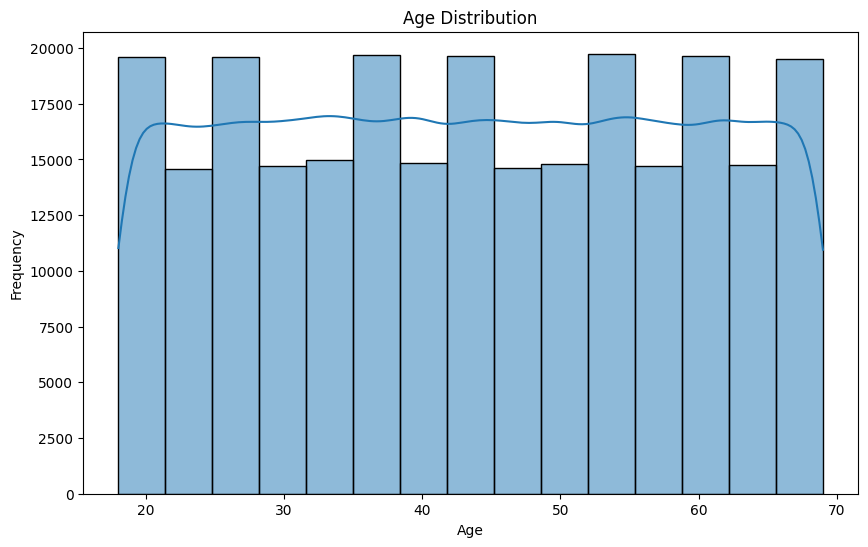

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


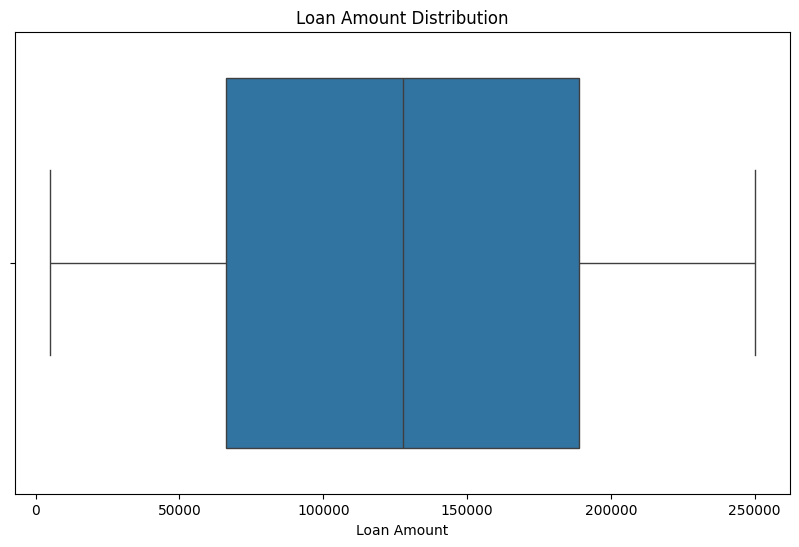

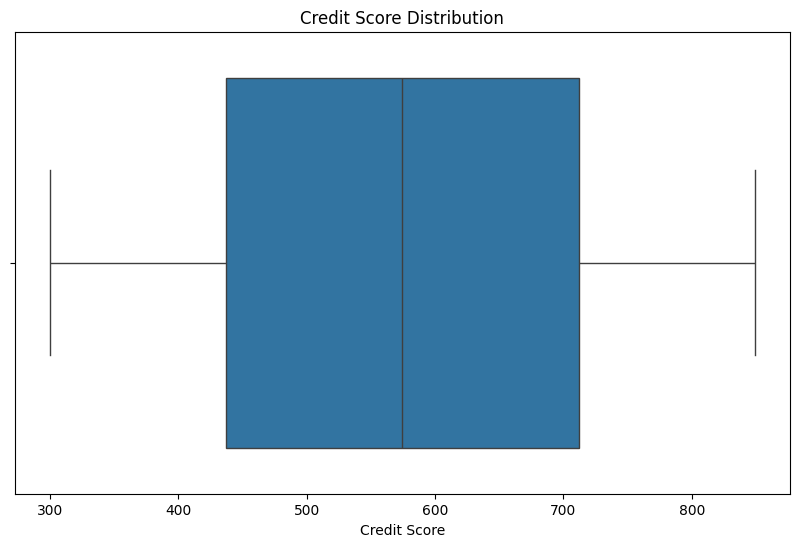

In [10]:
# Box plot for Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['LoanAmount'])
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.show()

# Box plot for Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['CreditScore'])
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.show()


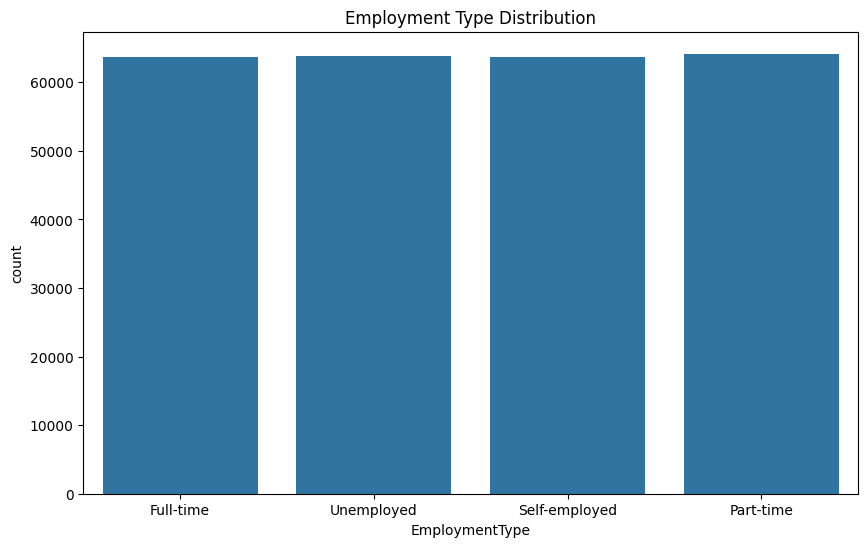

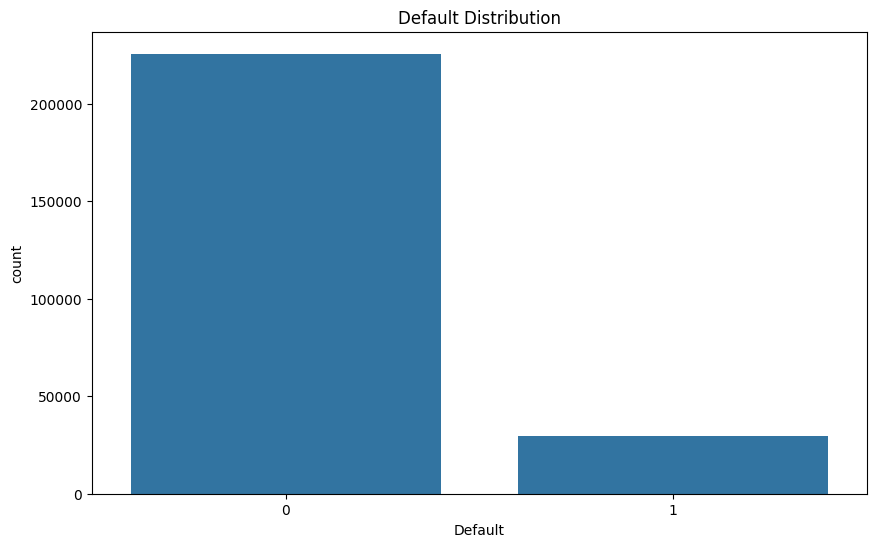

In [11]:
# Count plot for Employment Type
plt.figure(figsize=(10, 6))
sns.countplot(x='EmploymentType', data=data)
plt.title('Employment Type Distribution')
plt.show()

# Count plot for Default
plt.figure(figsize=(10, 6))
sns.countplot(x='Default', data=data)
plt.title('Default Distribution')
plt.show()


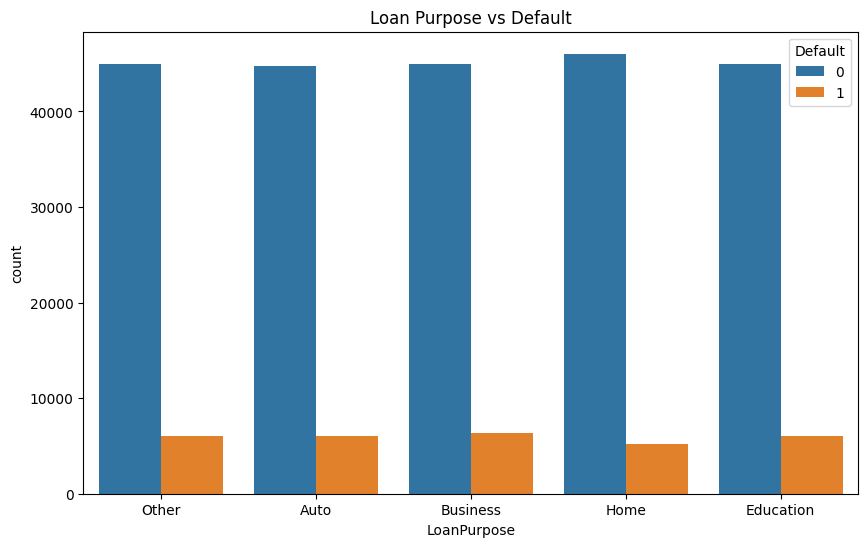

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanPurpose', hue='Default', data=data)
plt.title('Loan Purpose vs Default')
plt.show()


In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = pd.factorize(data[col])[0]

data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,0,0,0,0,0
1,1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,1,1,0,0,0
2,2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,0,0,1,1,1
3,3,32,31713,44799,743,0,3,7.07,24,0.23,2,0,1,1,1,2,1,0
4,4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,1,0,1,1,0


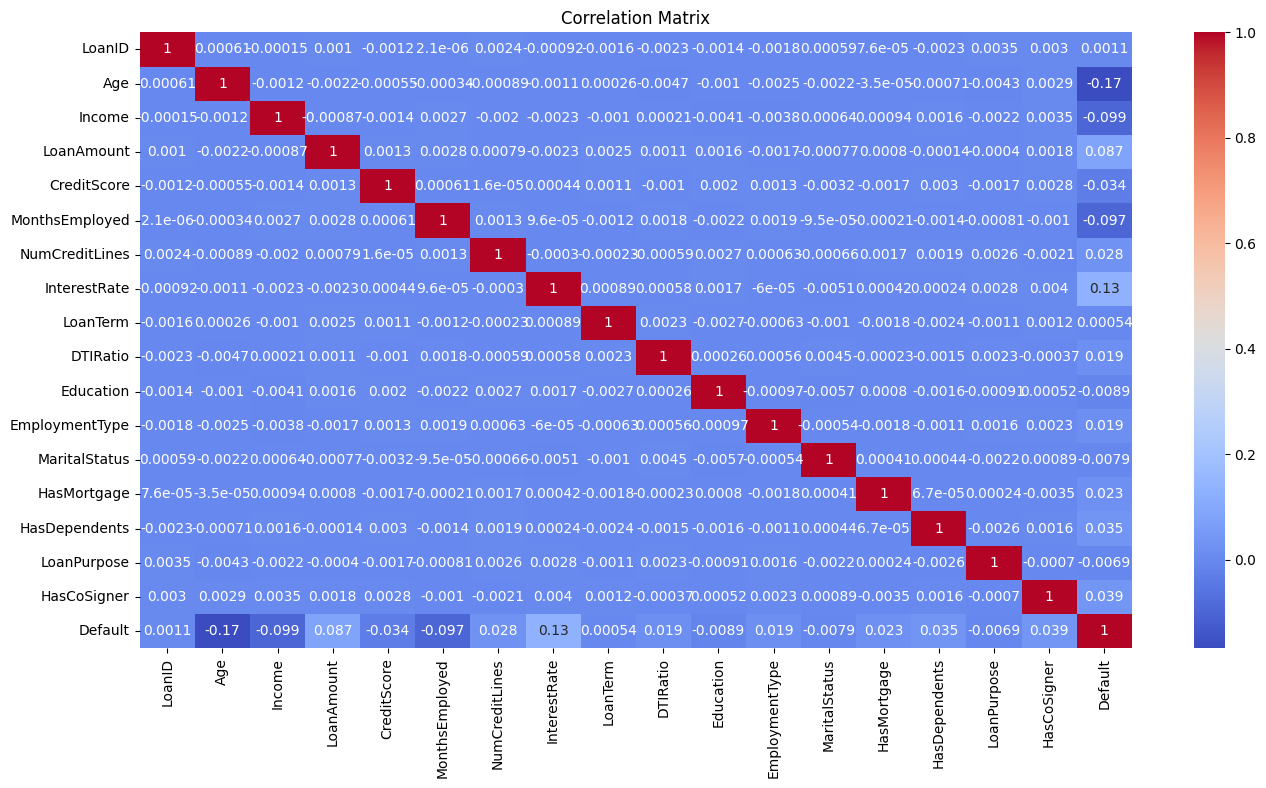

In [14]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
# Clean Data
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns = data.columns.str.replace('-', '_').str.replace('.', '_')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

data.head()

,loanid,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,0.000000,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
1,0.000004,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0.333333,0.000000,0.5,1.0,1.0,0.00,0.0,0.0
2,0.000008,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,0.333333,0.333333,0.0,0.0,0.0,0.25,1.0,1.0
3,0.000012,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0.666667,0.000000,0.5,1.0,1.0,0.50,1.0,0.0
4,0.000016,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0.000000,0.333333,0.0,1.0,0.0,0.25,1.0,0.0


In [17]:
non_loan_data = (data[data["default"] == 0])
loan_data = (data[data["default"] == 1])
print(f"Non Loan data: {len(non_loan_data)}")
print(f"Loan data: {len(loan_data)}")

Non Loan data: 225694
Loan data: 29653


In [18]:
test_non_loan_data = non_loan_data[:67000]
test_loan_data = loan_data[:8800]
train_non_loan_data = non_loan_data[67000:]
train_loan_data = loan_data[8800:]
test_data = pd.concat([test_loan_data,test_non_loan_data])
train_data = pd.concat([train_non_loan_data,train_loan_data])

X_test = test_data.drop('default', axis=1)
y_test = test_data['default']

X_train = train_data.drop('default', axis=1)
y_train = train_data['default']

print(f"Test data: {len(test_data)}")
print(f"Train data: {len(train_data)}")

Test data: 75800
Train data: 179547


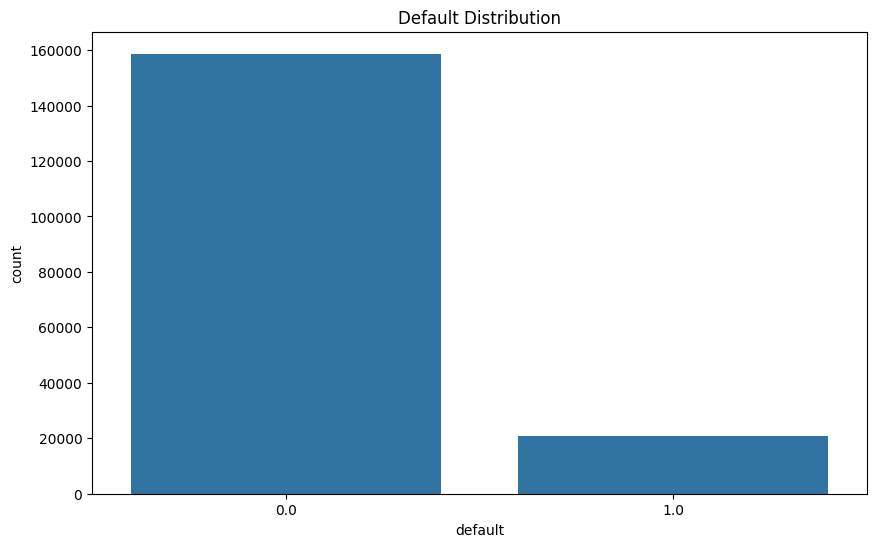

In [19]:
# Count plot for Default in train_data
plt.figure(figsize=(10, 6))
sns.countplot(x='default', data=train_data)
plt.title('Default Distribution')
plt.show()

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train.head(), y_train.head()

(     loanid       age    income  loanamount  creditscore  monthsemployed  \
 0  0.296817  0.666667  0.241276    0.880461     0.633880        0.966387   
 1  0.296821  0.901961  0.879910    0.580925     0.834244        0.907563   
 2  0.296825  0.039216  0.176749    0.251442     0.867031        0.739496   
 3  0.296829  0.823529  0.277758    0.200217     0.302368        0.815126   
 4  0.296833  0.333333  0.677398    0.213425     0.083789        0.554622   
 
    numcreditlines  interestrate  loanterm  dtiratio  education  \
 0        0.000000      0.995217      0.25    0.2500   1.000000   
 1        0.333333      0.833478      1.00    0.3875   0.000000   
 2        1.000000      0.606087      0.75    0.6000   0.666667   
 3        0.000000      0.666522      1.00    0.1250   0.666667   
 4        0.333333      0.912609      0.00    0.7625   1.000000   
 
    employmenttype  maritalstatus  hasmortgage  hasdependents  loanpurpose  \
 0        0.666667            0.0          1.0        

Labels: [0. 1.]
Counts: [158694 158694]


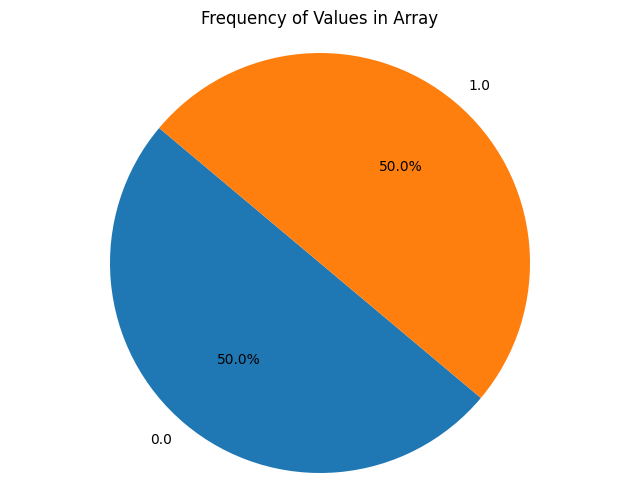

In [21]:
import numpy as np

labels, counts = np.unique(y_train, return_counts=True)

print(f"Labels: {labels}")
print(f"Counts: {counts}")

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Values in Array')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [22]:
# convert to tensor
import torch

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [23]:
from torch.utils.data import DataLoader, TensorDataset, random_split

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [24]:
from torch import nn

class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),

            nn.Linear(32, 1),  # Output layer for binary classification
            nn.Sigmoid()       # Sigmoid for outputting probabilities
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
input_size = X_train_tensor.shape[1]  # Number of input features
model = DNN(input_size)
model.to(device)
model

DNN(
  (model): Sequential(
    (0): Linear(in_features=17, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.4, inplace=False)
    (16): Linear(in_features=256, out_features=128, bias=True)
    (17): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_runni

In [25]:
# Binary Cross-Entropy for binary classification
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

Epoch [1/20], Loss: 0.5827
Epoch [2/20], Loss: 0.5702
Epoch [3/20], Loss: 0.5658
Epoch [4/20], Loss: 0.5633
Epoch [5/20], Loss: 0.5614
Epoch [6/20], Loss: 0.5595
Epoch [7/20], Loss: 0.5581
Epoch [8/20], Loss: 0.5576
Epoch [9/20], Loss: 0.5564
Epoch [10/20], Loss: 0.5549
Epoch [11/20], Loss: 0.5546
Epoch [12/20], Loss: 0.5536
Epoch [13/20], Loss: 0.5537
Epoch [14/20], Loss: 0.5529
Epoch [15/20], Loss: 0.5521
Epoch [16/20], Loss: 0.5518
Epoch [17/20], Loss: 0.5515
Epoch [18/20], Loss: 0.5505
Epoch [19/20], Loss: 0.5495
Epoch [20/20], Loss: 0.5497


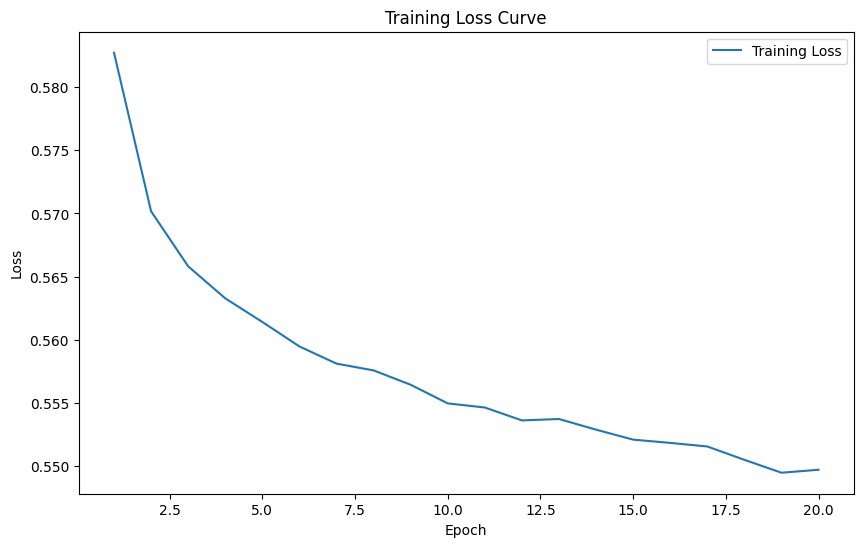

In [27]:
# Training loop with loss tracking
num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

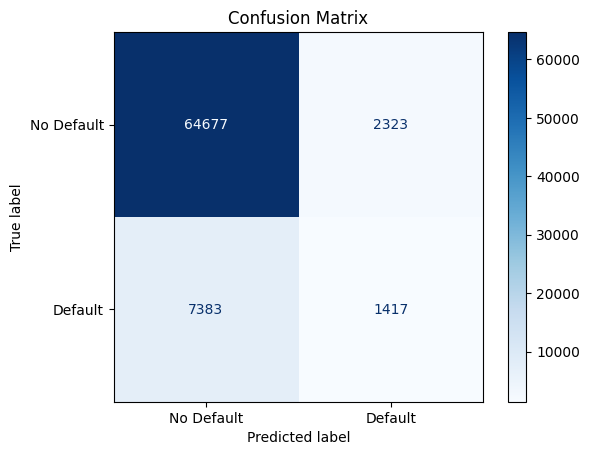

In [28]:
# Evaluate model and store true and predicted labels
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        predictions = (outputs > 0.5).float()

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
